In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
data=pd.read_csv(r"C:\Mba notes\novels\project data\nlp_train.csv")

In [3]:
data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [4]:
data[40:50]

,id,keyword,location,text,target
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0
41,61,ablaze,NaN,on the outside you're ablaze and alive\nbut yo...,0
42,62,ablaze,milky way,Had an awesome time visiting the CFC head offi...,0
43,63,ablaze,NaN,SOOOO PUMPED FOR ABLAZE ???? @southridgelife,0
44,64,ablaze,NaN,I wanted to set Chicago ablaze with my preachi...,0
45,65,ablaze,NaN,I gained 3 followers in the last week. You? Kn...,0
46,66,ablaze,"GREENSBORO,NORTH CAROLINA",How the West was burned: Thousands of wildfire...,1
47,67,ablaze,NaN,Building the perfect tracklist to life leave t...,0
48,68,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0
49,71,ablaze,England.,First night with retainers in. It's quite weir...,0


In [5]:
data["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [6]:
data[data["target"]==1]["text"].values[3]

'13,000 people receive #wildfires evacuation orders in California '

In [7]:

def clean(text):
    text=re.sub(r"@[A-Za-z0-9]","",text)
    text=re.sub(r"#","",text)
    text=re.sub(r"RT[\s]","",text)
    text=re.sub(r"https?:/\/\S+","",text)
    text=re.sub(r"\n"," ",text)
    text=re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r' \1 ', text)
    text=re.sub(r'[^\w\s\?]', '', text)
    text=re.sub(r'([\;\:\|•«\n])', ' ', text)
    text=re.sub(r'(\?\s\?\s\?\s\?)', ' ', text)  
    return text

In [8]:
data1=data.copy()
data1["text"]=data1["text"].apply(clean)
data2=data1.copy()

In [9]:
def text(phrase_no):
    a=data2[data2["id"]==phrase_no]["text"].values[0]
    return a
text(65)

'I gained 3 followers in the last week   You ?  Know your stats and grow with '

In [10]:
a="as(ish)"
def cleanlocation(location):
    text=re.sub("Instagram - @","",str(location))
    text=re.sub(r"MÌ©xico","Mexico",str(location))
    text=re.sub(r"\|","",str(location))
    return text

In [11]:
a="Ashish%23"
def cleankey(keyword):
    text=re.sub("%\d{1,10}","",str(keyword))
    return text
cleankey(a)

'Ashish'

In [12]:
data2=data1.copy()
data2["keyword"]=data2["keyword"].apply(cleankey)
data2["location"]=data2["location"].apply(cleanlocation)


In [13]:
data2[40:50]

,id,keyword,location,text,target
40,59,ablaze,Live On Webcam,Check these out nsfw,0
41,61,ablaze,nan,on the outside you re ablaze and alive but yo...,0
42,62,ablaze,milky way,Had an awesome time visiting the CFC head offi...,0
43,63,ablaze,nan,SOOOO PUMPED FOR ABLAZE ? ? ? ? outhridge...,0
44,64,ablaze,nan,I wanted to set Chicago ablaze with my preachi...,0
45,65,ablaze,nan,I gained 3 followers in the last week You ? ...,0
46,66,ablaze,"GREENSBORO,NORTH CAROLINA",How the West was burned Thousands of wildfires...,1
47,67,ablaze,nan,Building the perfect tracklist to life leave t...,0
48,68,ablaze,Live On Webcam,Check these out nsfw,0
49,71,ablaze,England.,First night with retainers in It s quite we...,0


In [14]:
? ? ? ?
a="a??sh_i ? ? ? ? sh"
def cleantext1(text):
    text=re.sub(r"\?\s\?","",text)
    text=re.sub(r"[A-Za-z]\s\?\s\?\s\?\s\?\s[A-Za-z]","",text)
    text=re.sub(r"\?\s\s\?\s\s\?\s\s\?\s","",text)
    text=re.sub(r"\?\s\s\?\s\s\?\s\s\?\s\s\?\s\s\?\s\s\?\s\s\?","",text)
    text=re.sub(r"\?\s\s\?","",text)
    text=re.sub(r"_"," ",text)
    return text
cleantext1(a)

Object ` ? ? ` not found.


'a??sh i   sh'

In [15]:
data2["text"]=data2["text"].apply(cleantext1)

In [16]:
text(65)

'I gained 3 followers in the last week   You ?  Know your stats and grow with '

In [17]:
data2.sample(30)

,id,keyword,location,text,target
1339,1937,burningbuildings,nan,oxnewsvideo IIAmericanGirI NHQDC So whe...,1
6976,10006,tsunami,nan,ric Tsunami worry about yourself,0
4367,6202,hijacker,USA,How to remove BrowseråÊHijacker,0
4138,5885,harm,Global,Quality Metrics Penalties May Harm Patient Car...,0
4858,6917,massmurderer,Leaving Bikini Bottom,seeing as how this person is a mass murderer a...,0
548,797,battle,nan,CIVIL WAR GENERAL BATTLE BULL RUN HERO COLONEL...,1
1548,2237,chemicalemergency,"Seattle, Washington",Downtown Emergency Service Center is hiring a ...,0
6874,9857,trauma,Colorado,What happens to us as sexual trauma survivors ...,0
2994,4301,duststorm,"El Paso, Texas",NASA MODIS image Dust storm over Morocco and t...,1
6046,8642,sinkhole,Unknown,Sinkhole Selfies You Wont Believe What s In T...,0


In [18]:
text(9373)

'Well me and dad survived my driving   '

In [19]:
text(1221)

'I really wanna brownie batter blizzard   '

In [20]:
text(3122)

'MH370 debris found on reunion island      sad tragedy innocent crash mh370'

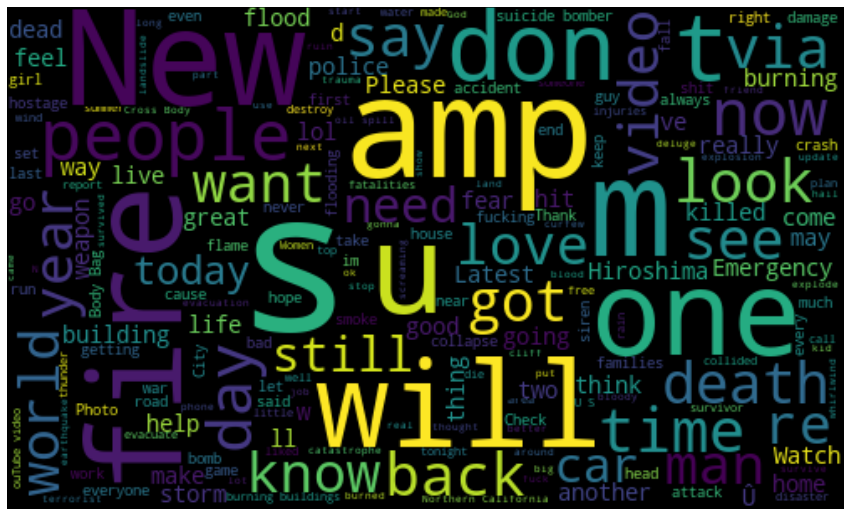

In [21]:
import wordcloud
plt.figure(figsize=(15,10))
allwords=" ".join([i for i in data2["text"]])
cloud=wordcloud.WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allwords)
plt.imshow(cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

amp is ain't my problem

In [22]:
data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [23]:
data.shape

(7613, 5)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(data2["text"],data2.target,test_size=0.2)

In [26]:
x_train

6119    That horrible sinking feeling when youÛªve bee...
6959    6 Trends Are Driving a Data Tsunami for Startu...
2308    ngusMacNeilSNP Every case for Yes has been utt...
3815    ÛWe Can HelpÛª Says Denver Firefighter Working...
885        infected bloody ear piercings are always fun  
                              ...                        
408     Arson suspect linked to 30 fires caught in Nor...
605     FedEx no longer shipping bioterror germs  WXIA...
6584    rovolturi3000 survived because of magic  she i...
6578    Breaking news Haunting memories drawn by survi...
7608    Two giant cranes holding a bridge collapse int...
Name: text, Length: 6090, dtype: object

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
v=CountVectorizer()
x_train_count=v.fit_transform(x_train.values)

In [29]:
x_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
x_train_count

<6090x15537 sparse matrix of type '<class 'numpy.int64'>'
	with 78102 stored elements in Compressed Sparse Row format>

In [32]:
model=MultinomialNB()
model.fit(x_train_count,y_train)
x_test

6925    Strawberries are in big trouble   Scientists r...
5843               smokers that ruin that new car smell  
6540    heSmallClark   He  ll kill me instead if he su...
1460      tavernise France agreed to repay Russia for ...
355     Vote for Directioners vs Queens in the 5th rou...
                              ...                        
7307    enFeinstein   Thanks Sen   Feinstein now hurry...
1211              into burning fucking buildings   2  2  
6349    Photo Failure in structural integrity affects ...
6281      Calgarians stunned by storm insurance compan...
1544    jcoyle        need to be included in emergency...
Name: text, Length: 1523, dtype: object

In [33]:
x_test_count=v.transform(x_test)

In [34]:
model.score(x_test_count,y_test)

0.8108995403808273

In [53]:
model2=RandomForestClassifier()
model2.fit(x_train_count,y_train)
model2.score(x_test_count,y_test)


0.788575180564675

In [47]:

m=AdaBoostClassifier(base_estimator=MultinomialNB(),n_estimators=600)
m.fit(x_train_count,y_train)
m.score(x_test_count,y_test)

0.8049901510177282

In [51]:
n=GradientBoostingClassifier()
n.fit(x_train_count,y_train)
n.score(x_test_count,y_test)

0.7524622455679579

In [56]:
xgb=XGBClassifier()
xgb.fit(x_train_count,y_train)
xgb.score(x_test_count,y_test)

C:\Mba notes\novels\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:00:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7754432042022325

In [49]:
model.score(x_test_count,y_test)

0.8115561391989494

In [18]:
data[1:10]

,id,keyword,location,text,target
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [50]:
len(data)

7613

In [59]:
x=data["text"]
y=data["target"]

In [60]:
model3=MultinomialNB()

In [61]:
model3.fit(x_train_count,y_train)
model3.score(x_test_count,y_test)

0.8108995403808273

In [54]:
data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [55]:
data["location"].value_counts()

USA                  104
New York              71
United States         50
London                45
Canada                29
                    ... 
Huber Heights, OH      1
Dayton, OH             1
Lincoln                1
YA MOTHA BED           1
LIVERPOOL              1
Name: location, Length: 3341, dtype: int64

In [34]:
x_train1,x_test1,y_train1,y_test1=train_test_split(df1.text,df1.target,test_size=0.2)

NameError: name 'df1' is not defined

In [27]:
x_train1_count=v.fit_transform(x_train1.values)
x_train1_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
model1=MultinomialNB()

In [29]:
x_test1_count=v.transform(x_test1)

In [30]:
model1.fit(x_train1_count,y_train1)
model1.score(x_test1_count,y_test1)

0.7864173228346457

In [42]:
cross_val_score(LogisticRegression(max_iter=10000),x_count,y)

array([0.73342088, 0.65397242, 0.69271175, 0.70170828, 0.77135348])

In [32]:
data2=pd.read_csv(r"C:\Mba notes\novels\project data\nlp_test.csv")

In [33]:
data3=data2["text"]


In [34]:
data3=v.transform(data3)
data3

<3263x14074 sparse matrix of type '<class 'numpy.int64'>'
	with 39996 stored elements in Compressed Sparse Row format>

In [56]:
data4=model3.predict(data3)
data4=pd.DataFrame(data4)

In [57]:
data4["id"]=data2["id"]

In [58]:
data4["target"]=data4[0]

In [60]:
data4[1:10]

,0,id,target
1,1,2,1
2,1,3,1
3,1,9,1
4,1,11,1
5,1,12,1
6,0,21,0
7,0,22,0
8,0,27,0
9,0,29,0


In [61]:
pd.DataFrame(data4).to_csv(r"C:\Mba notes\novels\project_predictions\nlp_prediction2.csv")

# New

In [3]:
data=pd.read_csv(r"C:\Mba notes\novels\project data\nlp_train.csv")

In [4]:
data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [6]:
data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [24]:
data.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [29]:
def clean(text):
    lower=text.lower()
    res=re.sub(r"[^\w\s]","",lower)
    return res

In [18]:
data["text"]=data["text"].apply(clean)

In [56]:
df1=data.copy()
df1=df1.dropna(subset=["keyword"])
df1

,id,keyword,location,text,target
31,48,ablaze,Birmingham,bbcmtd wholesale markets ablaze httptcolhyxeohy6c,1
32,49,ablaze,Est. September 2012 - Bristol,we always try to bring the heavy metal rt http...,0
33,50,ablaze,AFRICA,africanbaze breaking newsnigeria flag set abla...,1
34,52,ablaze,"Philadelphia, PA",crying out for more set me ablaze,0
35,53,ablaze,"London, UK",on plus side look at the sky last night it was...,0
...,...,...,...,...,...
7578,10830,wrecked,NaN,jt_ruff23 cameronhacker and i wrecked you both,0
7579,10831,wrecked,"Vancouver, Canada",three days off from work and theyve pretty muc...,0
7580,10832,wrecked,London,fx forex trading cramer igers 3 words that wre...,0
7581,10833,wrecked,Lincoln,engineshed great atmosphere at the british lio...,0


In [57]:
df1.isnull().sum()

id             0
keyword        0
location    2472
text           0
target         0
dtype: int64

In [58]:
df1["keyword"]=df1["keyword"].apply(clean)

In [62]:
def clean1(text):
    text=re.sub(r"@[A-Za-z0-9]","",text)
    text=re.sub(r"#","",text)
    text=re.sub(r"RT[\s]","",text)
    text=re.sub(r"https?:/\/\S+","",text)
    text=re.sub(r"\n"," ",text)
    text=re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r' \1 ', text)
    text=re.sub(r'[^\w\s\?]', '', text)
    text=re.sub(r'([\;\:\|•«\n])', ' ', text)
    text=re.sub(r'(\?\s\?\s\?\s\?)', ' ', text)  
    return text

In [63]:
df1["keyword"]=df1["keyword"].apply(clean)
df1["text"]=df1["text"].apply(clean)

In [64]:
df1

,id,keyword,location,text,target
31,48,ablaze,Birmingham,bbcmtd wholesale markets ablaze httptcolhyxeohy6c,1
32,49,ablaze,Est. September 2012 - Bristol,we always try to bring the heavy metal rt http...,0
33,50,ablaze,AFRICA,africanbaze breaking newsnigeria flag set abla...,1
34,52,ablaze,"Philadelphia, PA",crying out for more set me ablaze,0
35,53,ablaze,"London, UK",on plus side look at the sky last night it was...,0
...,...,...,...,...,...
7578,10830,wrecked,NaN,jt_ruff23 cameronhacker and i wrecked you both,0
7579,10831,wrecked,"Vancouver, Canada",three days off from work and theyve pretty muc...,0
7580,10832,wrecked,London,fx forex trading cramer igers 3 words that wre...,0
7581,10833,wrecked,Lincoln,engineshed great atmosphere at the british lio...,0


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [75]:
tf_vect=TfidfVectorizer(min_df=1,stop_words="english")

In [77]:
matrix=tf_vect.fit_transform(df1["text"])

In [78]:
matrix

<7552x22343 sparse matrix of type '<class 'numpy.float64'>'
	with 69074 stored elements in Compressed Sparse Row format>

In [79]:
tf_names=tf_vect.get_feature_names()

In [81]:
tf_df=pd.DataFrame(matrix.toarray(),columns=tf_names)

In [82]:
tf_df

,0011,001116,0025,005225,010156,010217,0104,010401,0106,0111,...,ûïwhen,ûïymcglaun,ûïyou,ûò,ûòthe,ûòåêcnbc,ûó,ûóher,ûókody,ûûif
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
